In [4]:
 #imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as py
#import shap
#import plotly.graph_objs as go

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,matthews_corrcoef,f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [5]:
my_path = %pwd
print(my_path)
df = pd.read_csv(f'{my_path}/online_shoppers_intention.csv')
print (df.shape)
df.head(13)

/Users/shruthiarun/Desktop/shreyasassginment/fall2019/fall2019/DS6105/project
(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [8]:
# The revenue and weekend attributes which are string types are converted to integer values
df['Revenue'] = df['Revenue'].astype(int)
df['Weekend'] = df['Weekend'].astype(int)

In [9]:
#
month_map={'Jan':1,'Feb':2,'Mar':3,'April':4,'May':5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
df['Month']=df['Month'].map(month_map)
visitor_type={'New_Visitor':1,'Other':2,'Returning_Visitor':3}
df['VisitorType']=df['VisitorType'].map(visitor_type)

In [10]:
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,3,0,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,3,0,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,3,0,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,3,0,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,3,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,3,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,3,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,3,0,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null int64
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null int64
Weekend                    12330 non-null int64
Revenue                    12330 non-null int64
dtypes: float

In [12]:
df_train_valid,df_test = train_test_split(df, test_size = 0.3,shuffle=False)
df_train,df_valid = train_test_split(df_train_valid, test_size = 0.3,shuffle=False)

In [13]:
'''
Setting input and output values 
X will be all the columns except Survived 
Y will be  just Survived column
'''
Y_train = df_train["Revenue"]
X_train = df_train.drop(["Revenue"],axis = 1)
Y_valid = df_valid["Revenue"]
X_valid = df_valid.drop(["Revenue"],axis = 1)
Y_test = df_test["Revenue"]
X_test = df_test.drop(["Revenue"],axis = 1)
print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape,X_test.shape,Y_test.shape)

(6041, 17) (6041,) (2590, 17) (2590,) (3699, 17) (3699,)


In [124]:
'''
Determing the best K value 
'''
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline


rmse = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_valid) #make prediction on test set
    error = sqrt(mean_squared_error(Y_valid,pred)) #calculate rmse
    rmse.append(error) #store rmse values

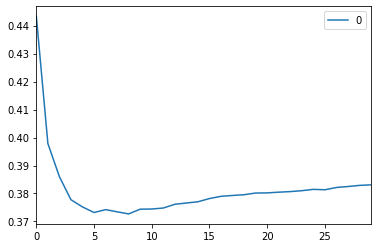

In [125]:
'''
plotting the rmse values against k values
'''
curve = pd.DataFrame(rmse) #elbow curve 
curve.plot()

In [126]:
'''
Applying KNN algorithm to training dataset 
Applying neighbours as 12 based on above elbow curve
'''
my_knn_model = KNeighborsClassifier(n_neighbors = 5,weights = 'distance')
my_knn_model.fit(X_train,Y_train)
'''
Predict on the validation set
'''
Y_pred = my_knn_model.predict(X_valid)

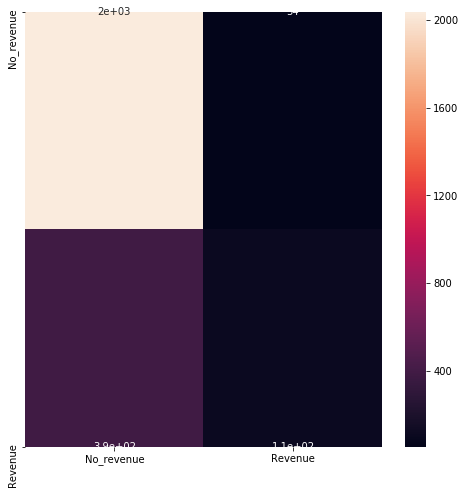

In [127]:
'''
Confusion Matrix creation train and validation
'''
from sklearn.metrics import confusion_matrix

my_knn_cmatrix = confusion_matrix(Y_valid,Y_pred)

my_knn_df = pd.DataFrame(my_knn_cmatrix)
plt.figure(figsize = (8,8))
sns.heatmap(my_knn_df, xticklabels = ["No_revenue","Revenue"],
            yticklabels = ["No_revenue","Revenue"],annot = True)

In [128]:
'''
Printing the accuracy score
'''
print(accuracy_score(Y_valid,Y_pred))
print(matthews_corrcoef(Y_valid,Y_pred),f1_score(Y_valid,Y_pred))

0.8297297297297297
0.32347593843085465 0.3408071748878923


In [129]:
import joblib
knn_model_fin = KNeighborsClassifier(n_neighbors = 5,weights = 'distance')
knn_model_fin.fit(X_train,Y_train)

!mkdir knn_model
knn_model_name = f'{my_path}/knn_model/knn_model_final.sav'
joblib.dump(knn_model_fin,knn_model_name)

mkdir: knn_model: File exists


['/Users/shruthiarun/Desktop/shreyasassginment/fall2019/fall2019/DS6105/project/knn_model/knn_model_final.sav']

In [130]:
kNN_loaded = joblib.load(f'{my_path}/knn_model/knn_model_final.sav')

In [131]:
Y_test_pred = kNN_loaded.predict(X_test)

In [132]:
print(accuracy_score(Y_test,Y_test_pred))
print(matthews_corrcoef(Y_test,Y_test_pred),f1_score(Y_test,Y_test_pred))

0.8172479048391457
0.2792615884404228 0.27931769722814503


In [133]:

model = RandomForestClassifier()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_valid)


/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [134]:
print(accuracy_score(Y_valid,Y_pred))
print(matthews_corrcoef(Y_valid,Y_pred),f1_score(Y_valid,Y_pred))

0.8552123552123552
0.47590032549646427 0.5376078914919852


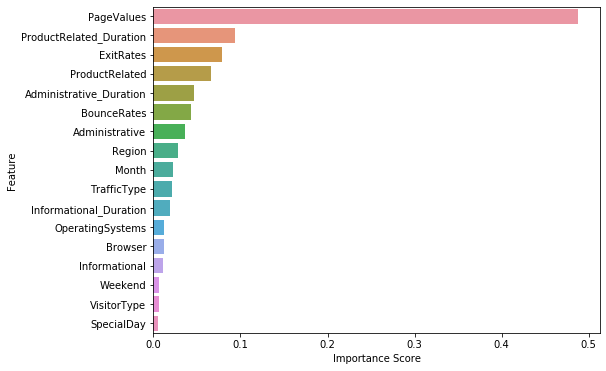

In [135]:


feat_imps = pd.DataFrame(model.feature_importances_, index = X_train.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

In [136]:
model = LogisticRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_valid)
print(accuracy_score(Y_valid,Y_pred))
print(matthews_corrcoef(Y_valid,Y_pred),f1_score(Y_valid,Y_pred))

0.8602316602316602
0.48919280255351794 0.537084398976982


/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [137]:
'''Import necessary packages'''
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(25, input_dim=17, init='uniform', activation='relu'))
model.add(Dense(20, init='uniform', activation='relu'))
model.add(Dense(15, init='uniform', activation='relu'))
model.add(Dense(10, init='uniform', activation='relu'))
model.add(Dense(5, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(25, input_dim=17, activation="relu", kernel_initializer="uniform")`
  """
/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, activation="relu", kernel_initializer="uniform")`
  
/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(15, activation="relu", kernel_initializer="uniform")`
  import sys
/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="relu", kernel_initializer="uniform")`
  
/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 AP

In [138]:
model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), nb_epoch=100, batch_size=5)

/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 6041 samples, validate on 2590 samples
Epoch 1/100
6041/6041 [==============================] - 4s 639us/step - loss: 0.3293 - accuracy: 0.8901 - val_loss: 0.5079 - val_accuracy: 0.8066
Epoch 2/100
6041/6041 [==============================] - 3s 542us/step - loss: 0.2239 - accuracy: 0.8904 - val_loss: 0.4878 - val_accuracy: 0.8066
Epoch 3/100
6041/6041 [==============================] - 3s 503us/step - loss: 0.2059 - accuracy: 0.9040 - val_loss: 0.4614 - val_accuracy: 0.8614
Epoch 4/100
6041/6041 [==============================] - 3s 507us/step - loss: 0.1990 - accuracy: 0.9257 - val_loss: 0.4359 - val_accuracy: 0.8641
Epoch 5/100
6041/6041 [==============================] - 3s 535us/step - loss: 0.1884 - accuracy: 0.9278 - val_loss: 0.4338 - val_accuracy: 0.8637
Epoch 6/100
6041/6041 [==============================] - 3s 502us/step - loss: 0.1864 - accuracy: 0.9296 - val_loss: 0.5381 - val_accuracy: 0.8633
Epoch 7/100
6041/6041 [==============================] - 3s 504us/step

In [139]:
# Evaluate the model
scores = model.evaluate(X_valid, Y_valid)
print ("Accuracy: %.2f%%" %(scores[1]*100))

2590/2590 [==============================] - 0s 32us/step
Accuracy: 85.64%


In [15]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV

model_grad_tune = GradientBoostingClassifier()
tune_grid = {'n_estimators' : [100,200,400,500],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [2,4, 8],
              'min_samples_leaf': [10,100],
              }

kfold = KFold(n_splits=15, random_state=20)
model_best = GridSearchCV(model_grad_tune,param_grid = tune_grid, cv=kfold, scoring="accuracy", n_jobs= 20, verbose = 1)

model_best.fit(X_train,Y_train)



Fitting 15 folds for each of 72 candidates, totalling 1080 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:   17.4s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:  1.7min
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:  6.5min
[Parallel(n_jobs=20)]: Done 760 tasks      | elapsed: 12.2min
[Parallel(n_jobs=20)]: Done 1080 out of 1080 | elapsed: 19.3min finished


GridSearchCV(cv=KFold(n_splits=15, random_state=20, shuffle=False),
             error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weig...
                                                  n_iter_no_change=None,
                                                  presort='auto',
                

Model Performance
Average Error: 0.1363 degrees.
Accuracy = 86.37%.
AUC = 0.72%.
Accuracy :  0.8637065637065637
Classification Report :
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2089
           1       0.72      0.49      0.58       501

    accuracy                           0.86      2590
   macro avg       0.80      0.72      0.75      2590
weighted avg       0.85      0.86      0.85      2590

Confusion Matrix :


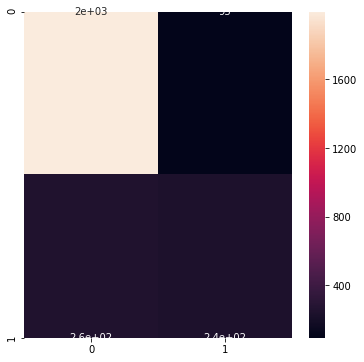

In [20]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = accuracy_score(predictions,test_labels)*100
    auc= roc_auc_score(test_labels, predictions)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))  
    print('AUC = {:0.2f}%.'.format(auc))
    return accuracy

def evaluate_model(y_test, y_pred):

  acc = accuracy_score(y_test, y_pred)
  print('Accuracy : ', acc)

  # classification report
  cr = classification_report(y_test, y_pred)
  print('Classification Report :')
  print(cr)
  
  # confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  print('Confusion Matrix :')
  
  plt.rcParams['figure.figsize'] = (6, 6)
  sns.heatmap(cm ,annot = True)
y_valid_best_pred=model_best.predict(X_valid)
best_grad_accuracy = evaluate(model_best,X_valid,Y_valid)
evaluate_model(Y_valid,y_valid_best_pred)

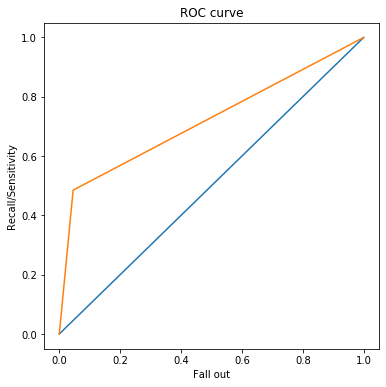

In [25]:
'''
Calculating ROC curve

'''
rec, fall_out, thresholds = roc_curve(Y_valid,y_valid_best_pred)
plt.plot([0,1],[0,1])
plt.plot(rec,fall_out, label='diabetes')
plt.xlabel('Fall out')
plt.ylabel('Recall/Sensitivity')
plt.title('ROC curve')
plt.show()

361.76374189999996
0.0
(-0.001, 1.0]         387
(1.0, 2.0]             36
(2.0, 4.0]             78
(4.0, 10.0]           225
(10.0, 23.0]          414
(23.0, 50.0]          437
(50.0, 110.0]         280
(110.0, 243.0]         43
(243.0, 532.0]          8
(532.0, 1167.0]         0
(1167.0, 2558.0]        0
(2558.0, 5608.0]        0
(5608.0, 12291.0]       0
(12291.0, 26940.0]      0
(26940.0, 59049.0]      0
Name: PageValues, dtype: int64


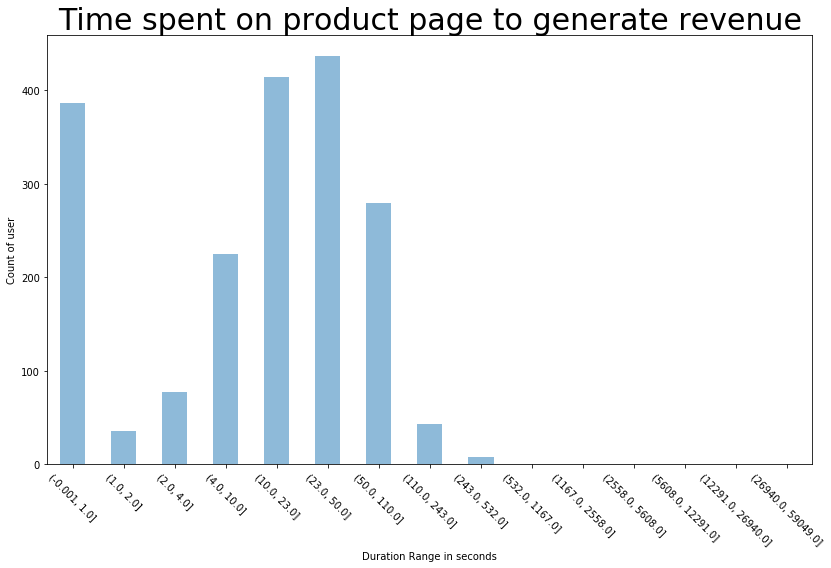

In [140]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = df[df['Revenue'] == True]
print(product_bought['PageValues'].max())
print(product_bought['PageValues'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['PageValues'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()
# plt.savefig("ProductDurationBasedRevenue.png")

246.7585902
0.0
(-0.001, 1.0]         9278
(1.0, 2.0]              55
(2.0, 4.0]             130
(4.0, 10.0]            339
(10.0, 23.0]           351
(23.0, 50.0]           192
(50.0, 110.0]           66
(110.0, 243.0]          10
(243.0, 532.0]           1
(532.0, 1167.0]          0
(1167.0, 2558.0]         0
(2558.0, 5608.0]         0
(5608.0, 12291.0]        0
(12291.0, 26940.0]       0
(26940.0, 59049.0]       0
Name: PageValues, dtype: int64


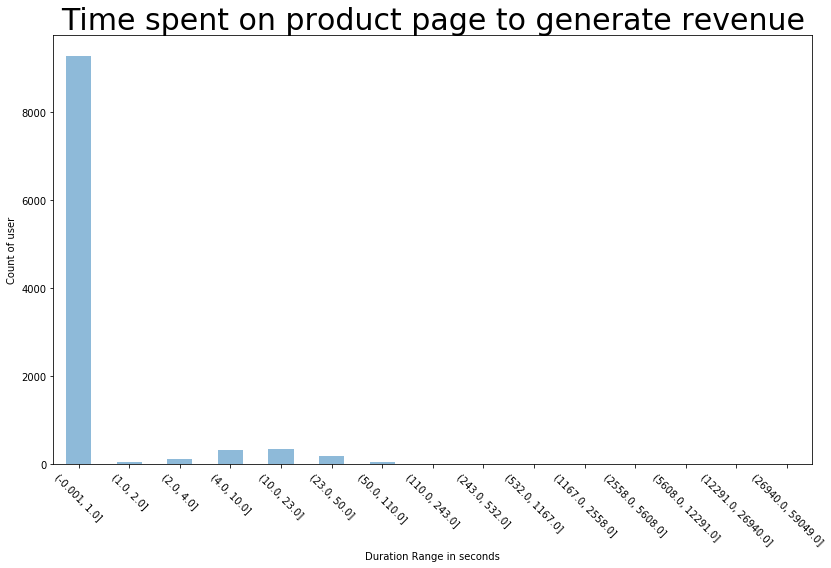

In [141]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = df[df['Revenue'] == False]
print(product_bought['PageValues'].max())
print(product_bought['PageValues'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['PageValues'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()

534
0
(-0.001, 1.0]          19
(1.0, 2.0]             20
(2.0, 4.0]             43
(4.0, 10.0]           205
(10.0, 23.0]          511
(23.0, 50.0]          566
(50.0, 110.0]         346
(110.0, 243.0]        167
(243.0, 532.0]         30
(532.0, 1167.0]         1
(1167.0, 2558.0]        0
(2558.0, 5608.0]        0
(5608.0, 12291.0]       0
(12291.0, 26940.0]      0
(26940.0, 59049.0]      0
Name: ProductRelated, dtype: int64


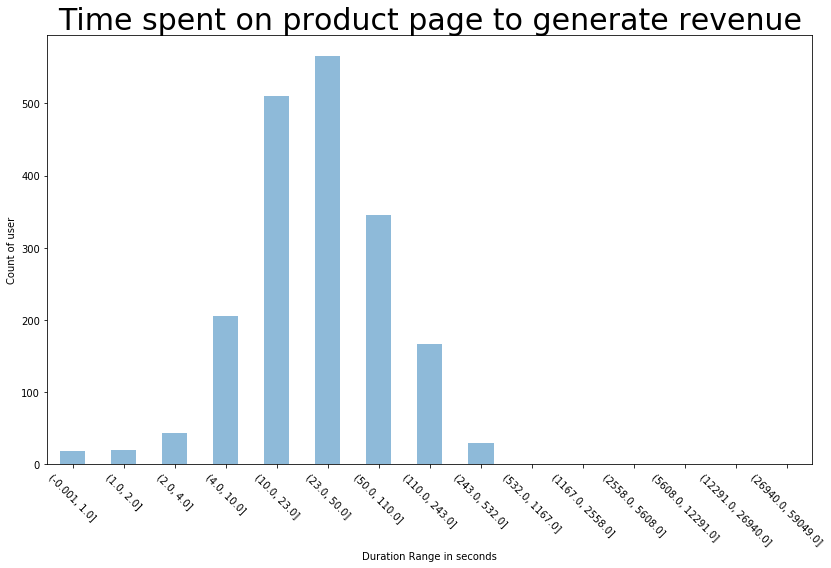

In [142]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = df[df['Revenue'] == True]
print(product_bought['ProductRelated'].max())
print(product_bought['ProductRelated'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['ProductRelated'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()

705
0
(-0.001, 1.0]          641
(1.0, 2.0]             445
(2.0, 4.0]             819
(4.0, 10.0]           1981
(10.0, 23.0]          2641
(23.0, 50.0]          2287
(50.0, 110.0]         1200
(110.0, 243.0]         349
(243.0, 532.0]          56
(532.0, 1167.0]          3
(1167.0, 2558.0]         0
(2558.0, 5608.0]         0
(5608.0, 12291.0]        0
(12291.0, 26940.0]       0
(26940.0, 59049.0]       0
Name: ProductRelated, dtype: int64


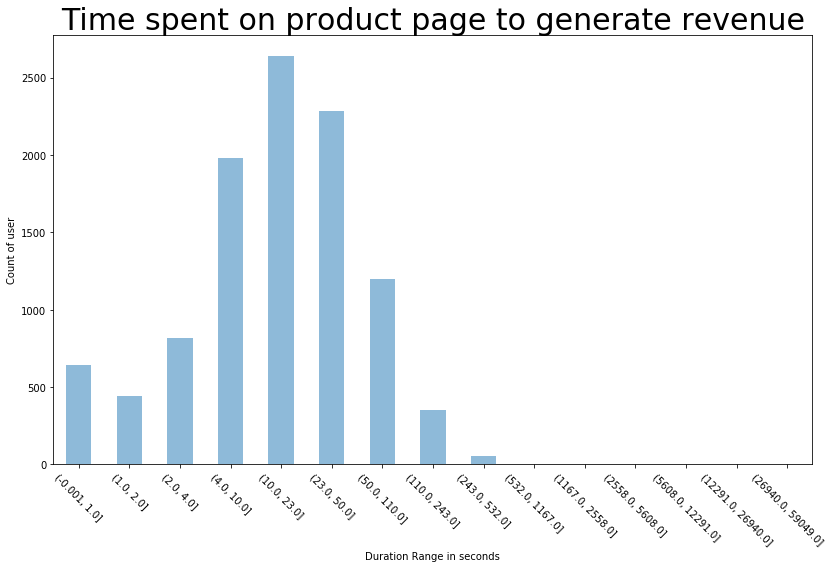

In [143]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = df[df['Revenue'] == False]
print(product_bought['ProductRelated'].max())
print(product_bought['ProductRelated'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['ProductRelated'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()

63973.522229999995
0.0
(-0.001, 1.0]          745
(1.0, 2.0]               0
(2.0, 4.0]              17
(4.0, 10.0]             61
(10.0, 23.0]           199
(23.0, 50.0]           368
(50.0, 110.0]          765
(110.0, 243.0]        1327
(243.0, 532.0]        1827
(532.0, 1167.0]       2152
(1167.0, 2558.0]      1869
(2558.0, 5608.0]       855
(5608.0, 12291.0]      208
(12291.0, 26940.0]      26
(26940.0, 59049.0]       2
Name: ProductRelated_Duration, dtype: int64


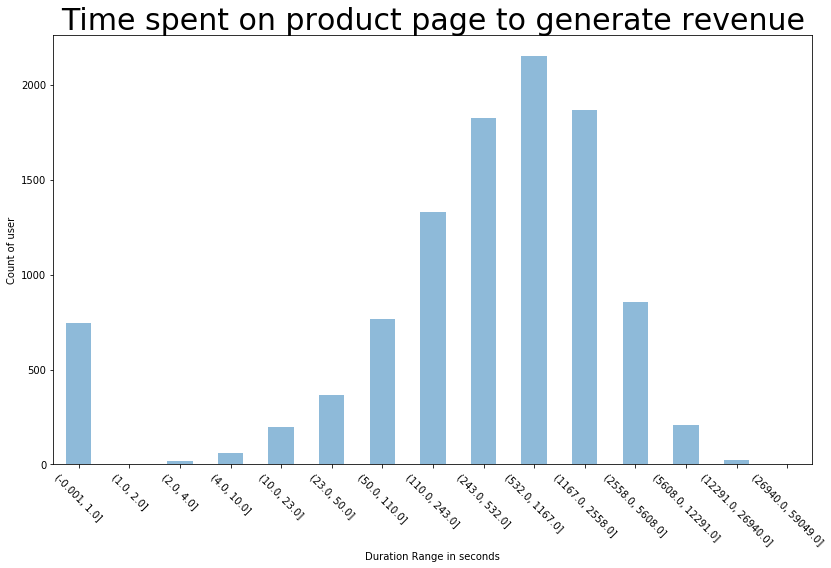

In [144]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = df[df['Revenue'] == False]
print(product_bought['ProductRelated_Duration'].max())
print(product_bought['ProductRelated_Duration'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['ProductRelated_Duration'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()

27009.85943
0.0
(-0.001, 1.0]          13
(1.0, 2.0]              0
(2.0, 4.0]              0
(4.0, 10.0]             6
(10.0, 23.0]           13
(23.0, 50.0]           17
(50.0, 110.0]          40
(110.0, 243.0]         89
(243.0, 532.0]        285
(532.0, 1167.0]       530
(1167.0, 2558.0]      503
(2558.0, 5608.0]      295
(5608.0, 12291.0]     101
(12291.0, 26940.0]     15
(26940.0, 59049.0]      1
Name: ProductRelated_Duration, dtype: int64


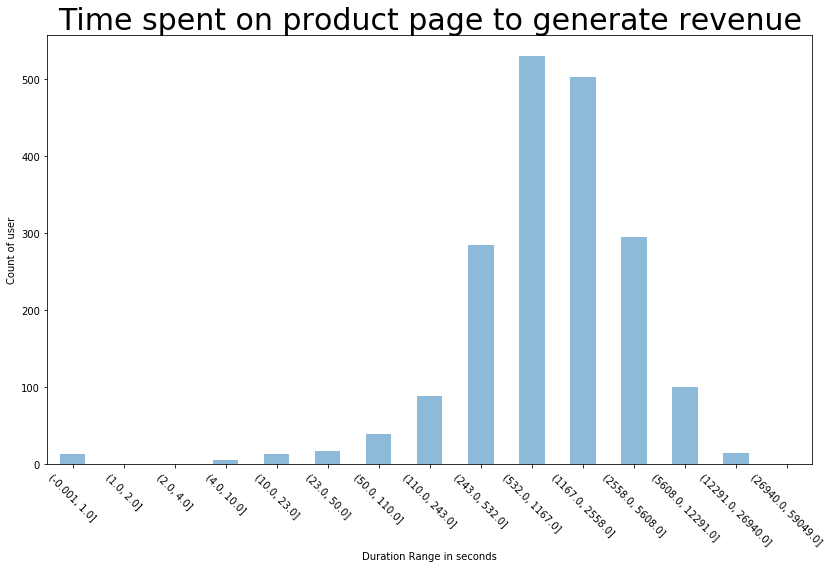

In [145]:
# Users buy a product or not based on how much time he spends on a product page.
product_bought = df[df['Revenue'] == True]
print(product_bought['ProductRelated_Duration'].max())
print(product_bought['ProductRelated_Duration'].min())

log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['ProductRelated_Duration'],
           log_spaced_data, right=True,include_lowest=True)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on product page to generate revenue', fontsize = 30)
plt.tight_layout()

1767.6666670000002
0.0
(0, 1]              0
(1, 2]              4
(2, 4]              6
(4, 10]            41
(10, 23]           54
(23, 50]          100
(50, 110]         107
(110, 243]        113
(243, 532]         87
(532, 1167]        45
(1167, 2558]        8
(2558, 5608]        0
(5608, 12291]       0
(12291, 26940]      0
(26940, 59049]      0
Name: Informational_Duration, dtype: int64


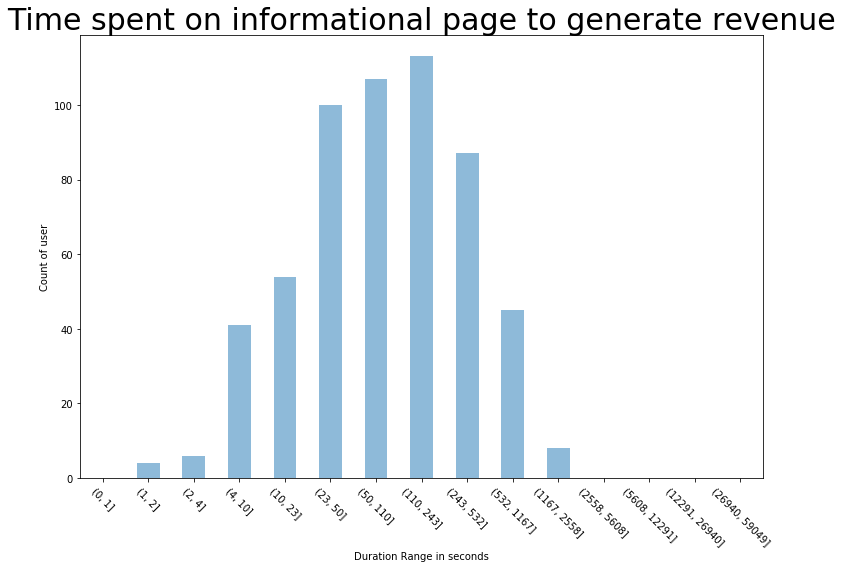

In [148]:
product_bought = df[df['Revenue'] == True]
print(product_bought['Informational_Duration'].max())
print(product_bought['Informational_Duration'].min())


log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['Informational_Duration'],
           log_spaced_data, right=True,include_lowest=False)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on informational page to generate revenue', fontsize = 30)
plt.tight_layout()
plt.savefig("InfoDurationBasedRevenue.png")

2549.375
0.0
(0, 1]              3
(1, 2]              8
(2, 4]             29
(4, 10]           127
(10, 23]          251
(23, 50]          311
(50, 110]         408
(110, 243]        343
(243, 532]        229
(532, 1167]        97
(1167, 2558]       34
(2558, 5608]        0
(5608, 12291]       0
(12291, 26940]      0
(26940, 59049]      0
Name: Informational_Duration, dtype: int64


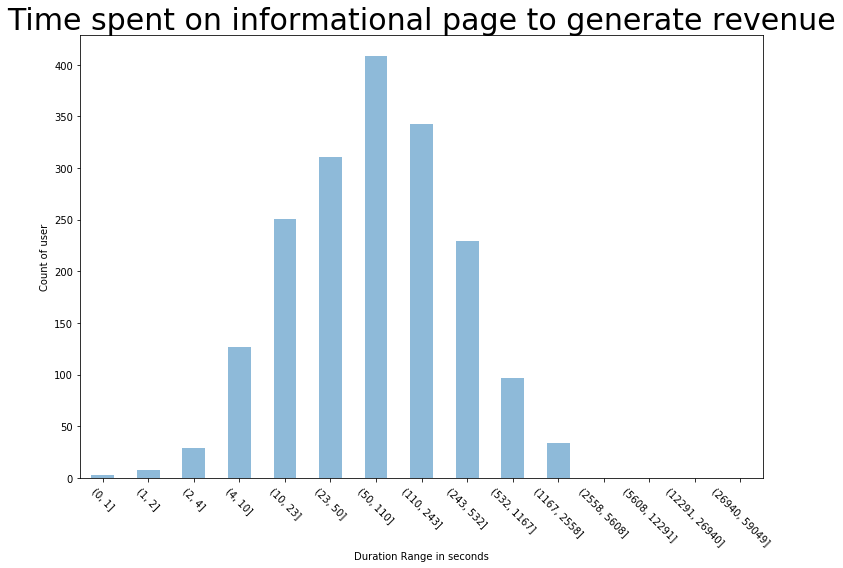

In [149]:
product_bought = df[df['Revenue'] == False]
print(product_bought['Informational_Duration'].max())
print(product_bought['Informational_Duration'].min())


log_spaced_data = np.logspace(start=0,stop=10,num=15,base=3,dtype='int',
                              endpoint=True)
log_spaced_data = np.append([0],log_spaced_data)
d = pd.cut(product_bought['Informational_Duration'],
           log_spaced_data, right=True,include_lowest=False)
print(d.value_counts(sort=False))
a = d.value_counts(sort=False).plot.bar(rot=-45,alpha=0.5,
                                         figsize=(12,8))
a.set_ylabel('Count of user')
a.set_xlabel('Duration Range in seconds')
plt.title('Time spent on informational page to generate revenue', fontsize = 30)
plt.tight_layout()
plt.savefig("InfoDurationBasedRevenue.png")

In [150]:
'''
Setting input and output values 
X will be all the columns except Survived 
Y will be  just Survived column
'''
Y_train = df_train["PageValues"]
X_train = df_train.drop(["PageValues"],axis = 1)
Y_valid = df_valid["PageValues"]
X_valid = df_valid.drop(["PageValues"],axis = 1)
Y_test = df_test["PageValues"]
X_test = df_test.drop(["PageValues"],axis = 1)
print(X_train.shape,Y_train.shape,X_valid.shape,Y_valid.shape,X_test.shape,Y_test.shape)

(6041, 17) (6041,) (2590, 17) (2590,) (3699, 17) (3699,)


In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()
model.fit(X_train,Y_train)

/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [153]:
scores = cross_val_score(model, X_train, Y_train)
print(scores)

/Users/shruthiarun/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.26447681 0.342395   0.11170729]


In [154]:
'''
calculate the rootmean square .lower the better.
Same function is used in class
'''
def my_rmse(y1,y2):
    return np.sqrt(((y1-y2)**2).mean())

def rsq_n_rmse(my_model,x_train,y_train,x_val,y_val):
    result = [my_model.score(x_train,y_train),my_model.score(x_val,y_val),
             my_rmse(my_model.predict(x_train),y_train),my_rmse(my_model.predict(x_val),y_val)]
    return "train rsq,val rsq,train rmse, val rmse", result

rsq_n_rmse(model,X_train,Y_train,X_valid,Y_valid)

('train rsq,val rsq,train rmse, val rmse',
 [0.8672732656941652,
  0.2398675017143611,
  5.857998456501022,
  16.991089348642827])

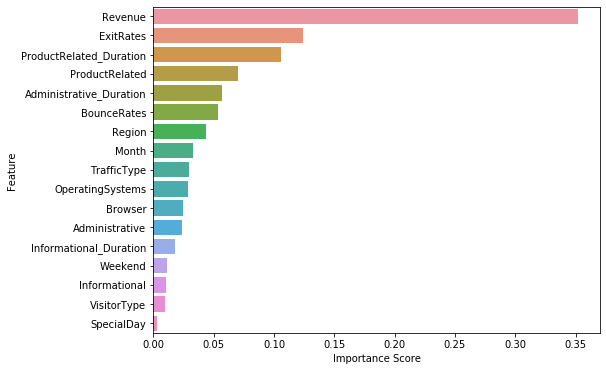

In [156]:
'''
Once the all other hyper parameter are tuned 
Calculate feature importance scores with your model
'''

feat_imps = pd.DataFrame(model.feature_importances_, index = X_train.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

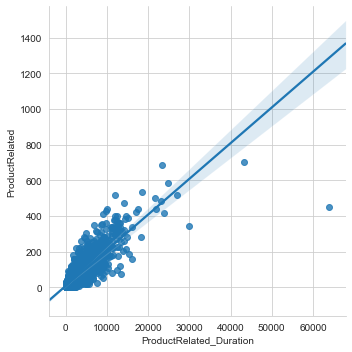

In [162]:
sns.set_style('whitegrid') 
sns.lmplot(x ='ProductRelated_Duration', y = 'ProductRelated', data = df)